<a href="https://colab.research.google.com/github/nickdevreker/CV-NLP-pneumonie-prj/blob/main/dd2604_eenvoudig_model_vanuit_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we will use Convolutional Neural Network to build train and test a pneumonia detection model in chest X-rays. We will build this model using tensorflow and keras. It is a binary classification problem. This model can be used to help docters improve their diagnosis process.

In [ ]:
# Run this cell and select the kaggle.json file downloaded from the Kaggle account settings page.
from google.colab import files
files.upload()

{}

We will start by connecting to Kaggle using Kaggle API which can be downloaded from your Kaggle account's settings and uploading it here(upload box).

In [ ]:
# Next, install the Kaggle API client.
!pip install -q kaggle

Installing kaggle api using pip

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle, so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

Setting up Kaggle using Kaggle API.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CV KUL/master

/content/drive/MyDrive/CV KUL/master


In [ ]:
# Creating directory and changing the current working directory
!mkdir X_rays
%cd X_rays

/content/drive/MyDrive/CV KUL/master/X_rays


To store the data we will create a new directory and make it as current working directory.

https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/

In [ ]:
# Searching for dataset
!kaggle datasets list -s rsna-pneumonia-detection-challenge

ref                                                           title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
tawsifurrahman/covid19-radiography-database                   COVID-19 Radiography Database                       778MB  2022-03-19 13:38:42          63963        821  1.0              
preetviradiya/covid19-radiography-dataset                     COVID-19 Radiography Dataset                        747MB  2021-05-22 05:04:10           3866         64  1.0              
tawsifurrahman/tuberculosis-tb-chest-xray-dataset             Tuberculosis (TB) Chest X-ray Database              663MB  2021-06-14 09:58:38           8569        142  0.9375           
andyczhao/covidx-cxr2                                         COVIDx C

Searching Kaggle for the required dataset using search option(-s) with title 'rsna-pneumonia-detection-challenge'. We can also use different search options like searching competitions, notebooks, kernels, datasets, etc.

In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download blank3030/rsnapneumoniadetectionchallenge
%cd ..

100% 3.66G/3.66G [00:44<00:00, 67.2MB/s]
100% 3.66G/3.66G [00:44<00:00, 89.0MB/s]
/content/drive/MyDrive/CV KUL/master


After searching the data next step would be downloading the data into collab notebook using references found in search option.

In [ ]:
%cd /content/drive/MyDrive/CV KUL/master/X_rays

[Errno 2] No such file or directory: '/content/drive/MyDrive/CV KUL/master/X_rays'
/content


In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip rsnapneumoniadetectionchallenge.zip -d X_rays


Streaminguitvoer ingekort tot de laatste 5000 regels.
  inflating: X_rays/stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: X_rays/stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: X_rays/stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: X_rays/stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: X_rays/stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: X_rays/stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: X_rays/stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: X_rays/stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: X_rays/stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: X_rays/stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: X_rays/stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: X_rays/st

We will unzip the data which is downloaded.

In [3]:
# Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Importing required libraries.

In [4]:
!pip install pydicom
import pydicom
import cv2
from tqdm.notebook import tqdm
from pathlib import Path

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.6 MB/s eta 0:00:00


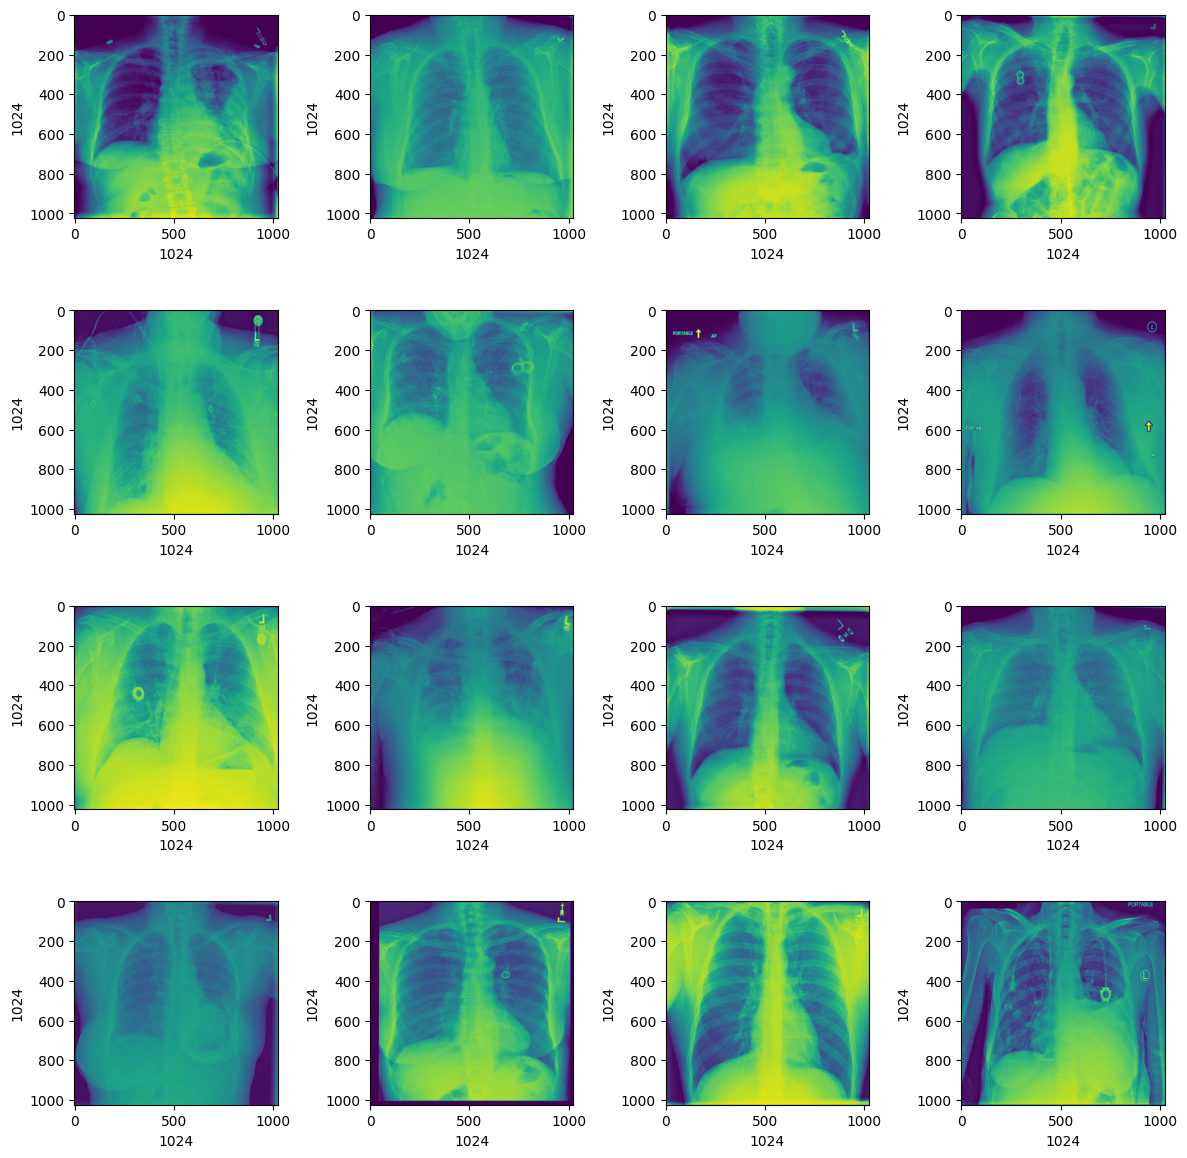

In [ ]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12,12))
path = "/content/drive/MyDrive/CV KUL/master/X_rays/X_rays/stage_2_test_images"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = pydicom.read_file(path +'/'+ random.choice(sorted(os.listdir(path)))).pixel_array
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [5]:
labels = pd.read_csv("/content/drive/MyDrive/CV KUL/master/X_rays/X_rays/stage_2_train_images/stage_2_train_labels.csv")
labels.head(6)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [6]:
# Remove duplicate entries
labels = labels.drop_duplicates("patientId")
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [8]:
ROOT_PATH = Path("/content/drive/MyDrive/CV KUL/master/X_rays/X_rays/stage_2_train_images")


Visualizing some coloured random images  from the test dataset. we can see here 

---

that the dimension of images are igual.

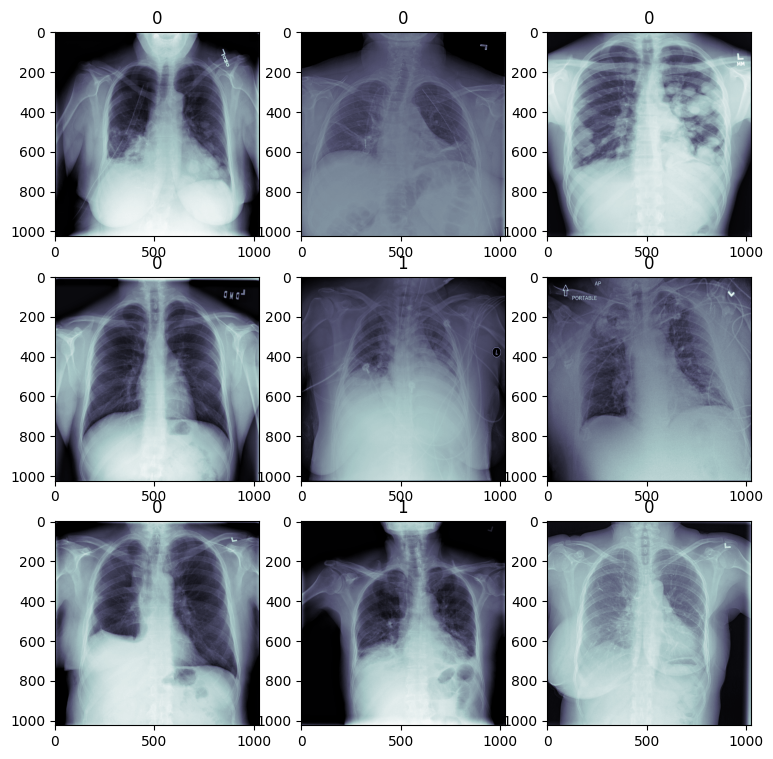

In [ ]:
fig, axis = plt.subplots(3, 3, figsize=(9, 9))
c = 0
for i in range(3):
    for j in range(3):
        patient_id = labels.patientId.iloc[c]
        dcm_path = ROOT_PATH/patient_id
        dcm_path = dcm_path.with_suffix(".dcm")
        dcm = pydicom.read_file(dcm_path).pixel_array
        
        label = labels["Target"].iloc[c]
        
        axis[i][j].imshow(dcm, cmap="bone")
        axis[i][j].set_title(label)
        c+=1

In [ ]:
num_files = len(os.listdir(ROOT_PATH))
print(num_files)

In [ ]:


nr_train_images = 1000  # Om het aantal afbeelding in de training set te beperken. Verhoog indien jouw systeem het toelaat.
train_images = []
train_labels = []


c=0
for f in os.listdir(ROOT_PATH)[:nr_train_images]:#zo pc power kan nr_train_images vervangen worden door num_files

   patient_id = labels.patientId.iloc[c]
   dcm_path = ROOT_PATH/patient_id
   dcm_path = dcm_path.with_suffix(".dcm")
   dcm = pydicom.read_file(dcm_path).pixel_array / 255  
     # Resize the image as 1024x1024 is way to large to be handeled by Deep Learning models at the moment
    # Let's use a shape of 224x224
    # In order to use less space when storing the image we convert it to float16
   dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16)
 
   label = labels.Target.iloc[c]
   train_images.append(dcm_array)
   train_labels.append(label)
   c +=1

In [ ]:
X_train.shape

In [ ]:
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_train = X_train.reshape((len(X_train), 224, 224, 3))

X_train, y_train = shuffle(X_train, y_train)
X_train = X_train.astype('float32')


# Normalisatie
X_train /= 255

Now we will convert all the images into numpy array and normalize them.

Storing the label ids into numpy array and printing the shape. Here we can observe that their are 39209 label ids.

In [ ]:
X_train.shape

NameError: ignored

Now we will observe images per class for checking whether the data is balanced or not. From the result we can say that data is balanced.

In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(X_train, y_train , test_size = 0.2, random_state = 42)

The next step would be to split the data into training and validation with 80% of training data and 20% of validation data.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

Defining the model architecture. In this we will define all the layers with their input shape kernel size, activation, etc.

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0

Compiling the model using metrics, optimizer and loss as required and printing out the summary of the model.

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 184s - loss: 0.4137 - accuracy: 0.8650 - val_loss: 0.1094 - val_accuracy: 0.9783
Epoch 2/10
246/246 - 182s - loss: 0.3698 - accuracy: 0.8785 - val_loss: 0.0961 - val_accuracy: 0.9802
Epoch 3/10
246/246 - 182s - loss: 0.3428 - accuracy: 0.8871 - val_loss: 0.0826 - val_accuracy: 0.9832
Epoch 4/10
246/246 - 181s - loss: 0.3144 - accuracy: 0.8966 - val_loss: 0.0774 - val_accuracy: 0.9843
Epoch 5/10
246/246 - 183s - loss: 0.2891 - accuracy: 0.9043 - val_loss: 0.0681 - val_accuracy: 0.9856
Epoch 6/10
246/246 - 181s - loss: 0.2738 - accuracy: 0.9083 - val_loss: 0.0622 - val_accuracy: 0.9874
Epoch 7/10
246/246 - 182s - loss: 0.2535 - accuracy: 0.9163 - val_loss: 0.0671 - val_accuracy: 0.9879
Epoch 8/10
246/246 - 183s - loss: 0.2403 - accuracy: 0.9220 - val_loss: 0.0533 - val_accuracy: 0.9899
Epoch 9/10
246/246 - 181s - loss: 0.2325 - accuracy: 0.9229 - val_loss: 0.0545 - val_accuracy: 0.9902
Epoch 10/10
246/246 - 182s - loss: 0.2222 - accuracy: 0.9277 - val_loss: 0.0532 - 

Now we will fit the model and observe how our is getting trained on each epoch.

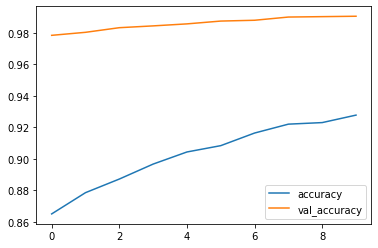

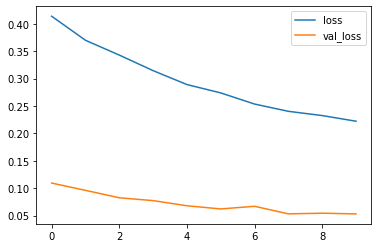

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Next we will visualize the accuracy and loss per epoch. For this we will store the model history in the pandas dataframe and plot them.

In [ ]:
y_pred = model.predict_classes(test_images);
y_pred

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([16,  1, 38, ..., 38,  7, 10])

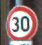

In [ ]:
# Visualize test image
img = Image.open(test_path + '/00001.png')
img

Let's visualize test image

In [ ]:
# Original label
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


Finding out original label for the image above.

In [ ]:
# Predicted label
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


Finding out the predicted label for the image above.

## Conclusion: